In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("fake_bills.csv",sep=';')

In [3]:
df.sample(4)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
972,True,171.40,103.88,103.54,3.75,2.80,113.01
503,True,172.46,103.51,103.85,4.23,3.14,113.38
447,True,171.59,103.86,104.33,4.12,2.84,114.00
1060,False,171.75,104.34,104.58,4.26,3.29,110.98


In [4]:
df.shape

(1500, 7)

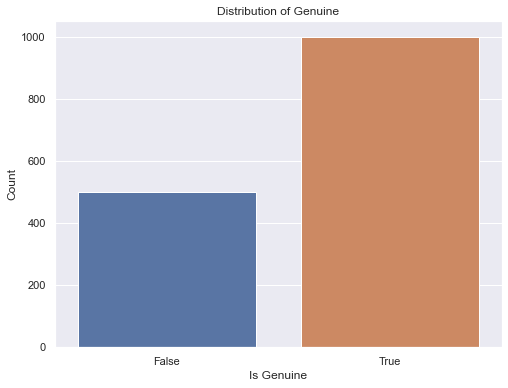

In [5]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="is_genuine", data=df)
ax.set_xlabel("Is Genuine")
ax.set_ylabel("Count")
ax.set_title("Distribution of Genuine")
plt.show()

In [6]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


Text(0.5, 1.0, 'Difference of length in fake and real notes')

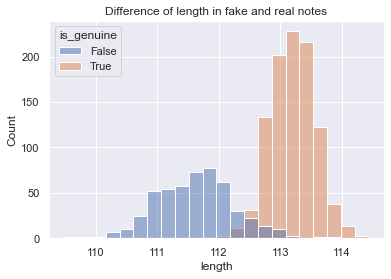

In [7]:
sns.histplot(data=df , x="length",hue="is_genuine")
plt.title("Difference of length in fake and real notes")

Text(0.5, 1.0, 'Difference of diagonal in fake and real notes')

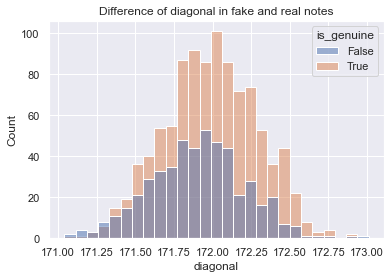

In [8]:
sns.histplot(data=df , x="diagonal",hue="is_genuine")
plt.title("Difference of diagonal in fake and real notes")

Text(0.5, 1.0, 'Difference of height left in fake and real notes')

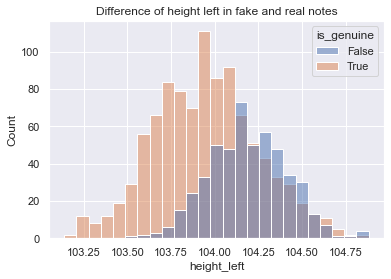

In [9]:
sns.histplot(data=df , x="height_left",hue="is_genuine")
plt.title("Difference of height left in fake and real notes")

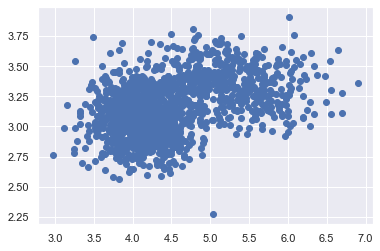

In [10]:
plt.scatter("margin_low", "margin_up",data=df)

<AxesSubplot:xlabel='margin_low', ylabel='Density'>

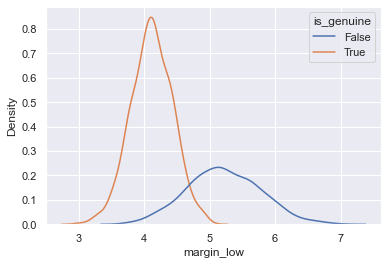

In [11]:
sns.kdeplot(data=df, x="margin_low",hue="is_genuine")

<AxesSubplot:xlabel='margin_up', ylabel='Density'>

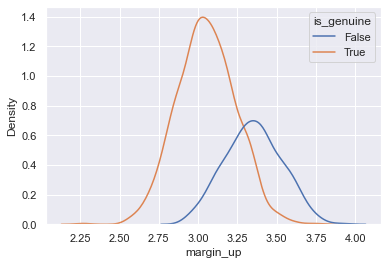

In [12]:
sns.kdeplot(data=df, x="margin_up",hue="is_genuine")

<AxesSubplot:title={'center':'HeatMap'}>

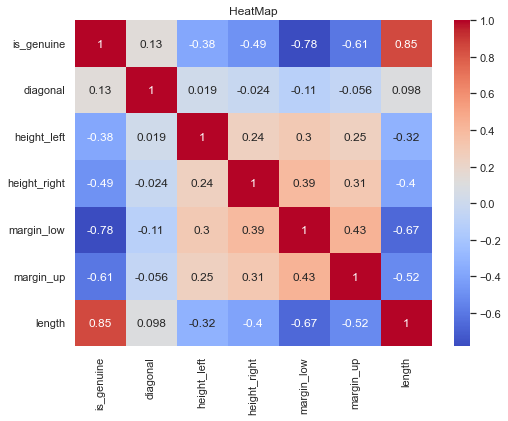

In [13]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
plt.title("HeatMap")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [14]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [15]:
df=df.dropna()

In [16]:
df.shape

(1463, 7)

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["is_genuine"]= encoder.fit_transform(df["is_genuine"])

In [18]:
y=df.is_genuine
X=df.drop(columns="is_genuine")
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X,y,random_state=99,test_size=0.2)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

classifiers = [
    ('LogisticRegression', LogisticRegression()),
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier())
]

# Train and evaluate each classifier
results = []
for name, clf in classifiers:
    pipeline = Pipeline([('classifier', clf)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))

# Print the results in a table
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy'])
print(results_df)

           Classifier  Accuracy
0  LogisticRegression  0.986348
1        RandomForest  0.989761
2    GradientBoosting  0.986348


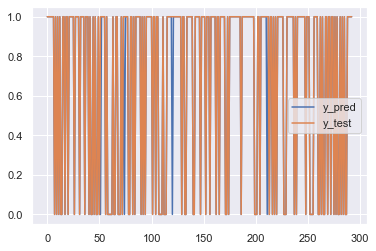

In [22]:
plt.plot(y_pred, label='y_pred')
plt.plot(y_test.values, label='y_test')
plt.legend()
plt.show()

In [24]:
results_df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
results_df

,y_pred,y_test
57,1,1
42,1,1
299,1,1
573,1,1
237,1,1
...,...,...
58,1,1
532,1,1
89,1,1
53,1,1


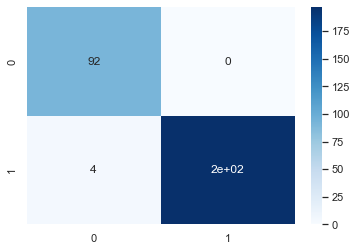

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

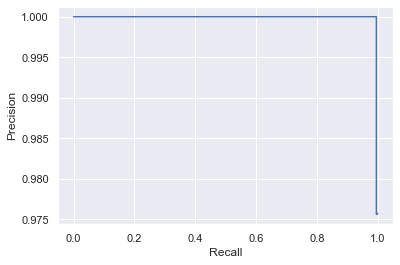

In [27]:
from sklearn.metrics import precision_recall_curve

# Train and evaluate a classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1]

# Create a precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


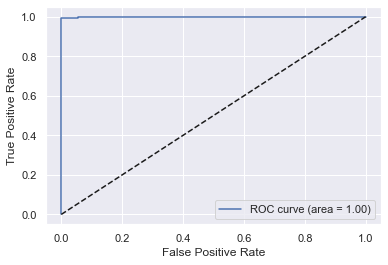

In [28]:
from sklearn.metrics import roc_curve, auc

# Train and evaluate a classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1]

# Create a ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [29]:
from sklearn.metrics import classification_report

# Train and evaluate a classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Create a classification report
report = classification_report(y_test, y_pred)

# Display the classification report
print(report)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        92
           1       1.00      0.98      0.99       201

    accuracy                           0.99       293
   macro avg       0.98      0.99      0.98       293
weighted avg       0.99      0.99      0.99       293



In [30]:
# Train and evaluate a classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba


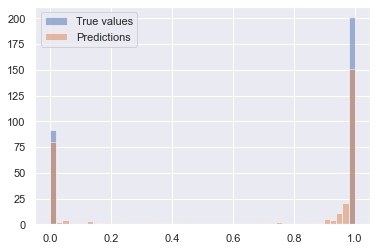

In [31]:
# Train and evaluate a classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1]

# Create histograms
plt.hist(y_test, bins=50, alpha=0.5, label='True values')
plt.hist(y_pred, bins=50, alpha=0.5, label='Predictions')
plt.legend()
plt.show()
